In [1]:
import numpy as np
import matplotlib.pyplot as plt

from framework_pkg.spectrum_event import SuperKSpectrum

plt.rcParams['text.usetex']=True
plt.style.use('classic')

In [2]:
param = {'SinT12': 0.308, 'M12': 6.9e-5}

MSWSpectrum   = SuperKSpectrum()
spectrum_data = MSWSpectrum.spectrum_data
energy_obs    = MSWSpectrum.energy_obs
b_un_per_day  = MSWSpectrum.unoscillated_events_per_day

spectrum_event_per_day = MSWSpectrum.__getitem__(param, name="MSW")
spectrum_event_per_day2 = MSWSpectrum.__getitem__(param, name="PseudoDirac")

<ErrorbarContainer object of 3 artists>

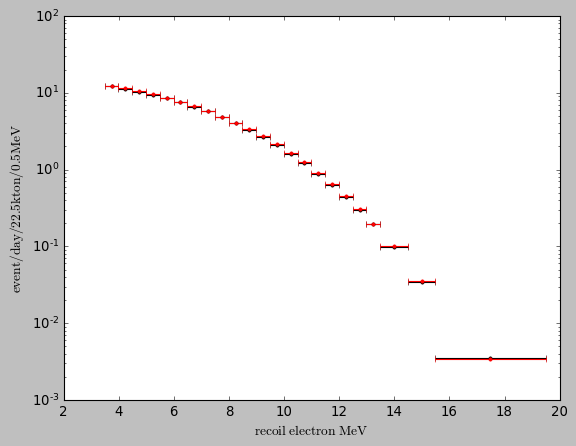

In [3]:
"""
Comparsion between our predection and the paper Phys. Rev. D 109, 092001 (2024).
expected B8 spectrum assuming no oscilation.
"""


plt.yscale('log')
plt.ylabel(r'$\rm event/day/22.5kton/0.5MeV$')
plt.xlabel(r'$\rm recoil \ electron \ MeV$')
plt.errorbar(0.5*(energy_obs[:,1]+energy_obs[:,0]), (0.5/(energy_obs[:,1]-energy_obs[:,0])) * spectrum_data[:,11]*22.5/365.25, yerr=None, xerr = 0.5*(energy_obs[:,1]-energy_obs[:,0]), fmt='k.' )
plt.errorbar(0.5*(energy_obs[:,1]+energy_obs[:,0]), (0.5/(energy_obs[:,1]-energy_obs[:,0])) * b_un_per_day , yerr=None, xerr =0.5*(energy_obs[:,1]-energy_obs[:,0]), fmt='r.')

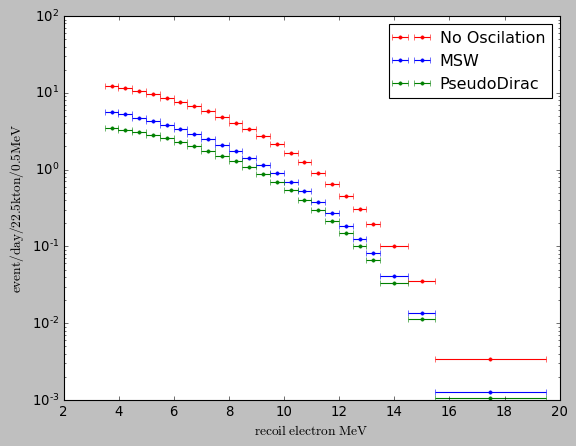

In [4]:
"""
B8 spectrum
"""
plt.yscale('log')
plt.ylabel(r'$\rm event/day/22.5kton/0.5MeV$')
plt.xlabel(r'$\rm recoil \ electron \ MeV$')

plt.errorbar(0.5*(energy_obs[:,1]+energy_obs[:,0]), (0.5/(energy_obs[:,1]-energy_obs[:,0])) * b_un_per_day , yerr=None,  xerr =0.5*(energy_obs[:,1]-energy_obs[:,0]), fmt='r.')
plt.errorbar(0.5*(energy_obs[:,1]+energy_obs[:,0]), (0.5/(energy_obs[:,1]-energy_obs[:,0])) * spectrum_event_per_day[0], yerr=None, xerr =0.5*(energy_obs[:,1]-energy_obs[:,0]), fmt='b.')
plt.errorbar(0.5*(energy_obs[:,1]+energy_obs[:,0]), (0.5/(energy_obs[:,1]-energy_obs[:,0])) * np.mean(spectrum_event_per_day2,axis=0), yerr=None, xerr =0.5*(energy_obs[:,1]-energy_obs[:,0]), fmt='g.')

plt.legend(['No Oscilation', 'MSW', 'PseudoDirac'])


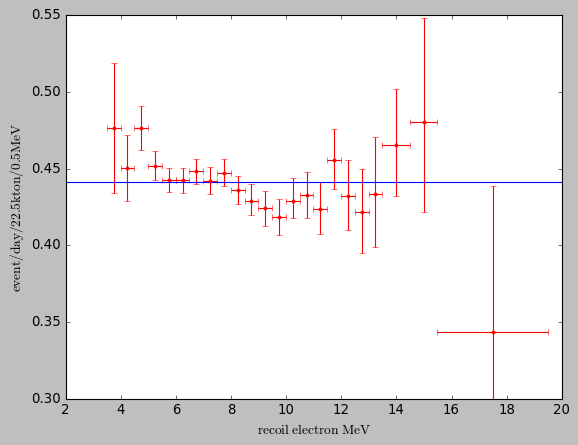

In [5]:
"""data illustration : B8 and hep
"""
plt.ylim(0.3,0.55)
plt.ylabel(r'$\rm event/day/22.5kton/0.5MeV$')
plt.xlabel(r'$\rm recoil \ electron \ MeV$')

plt.errorbar(0.5*(energy_obs[:,1]+energy_obs[:,0]), spectrum_data[:,2]/(spectrum_data[:,11]+spectrum_data[:,12]), yerr=np.array([spectrum_data[:,4],spectrum_data[:,3]])/(spectrum_data[:,11]+spectrum_data[:,12]), xerr=0.5*(energy_obs[:,1]-energy_obs[:,0]), fmt='r.')
plt.hlines(xmin=2,xmax=20,y=0.441)

<ErrorbarContainer object of 3 artists>

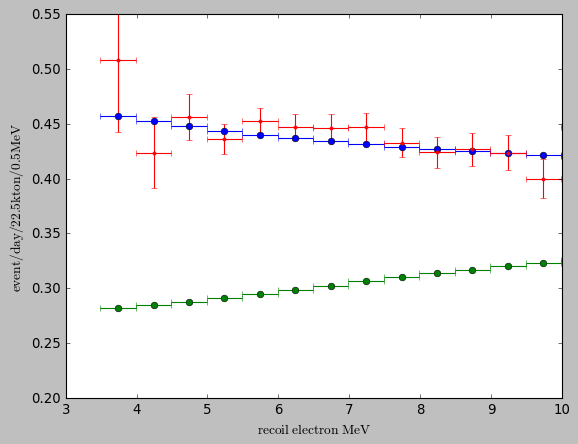

In [6]:
"""Observed B8_per_day spectrum data and MSW prediction"""

plt.xlim(3,10)
plt.ylim(0.2,0.55)
plt.ylabel(r'$\rm event/day/22.5kton/0.5MeV$')
plt.xlabel(r'$\rm recoil \ electron \ MeV$')


plt.errorbar(0.5*(energy_obs[:,1]+energy_obs[:,0]), np.mean(spectrum_event_per_day2,axis=0)/b_un_per_day, yerr=None, xerr =0.5*(energy_obs[:,1]-energy_obs[:,0]), fmt='go')
plt.errorbar(0.5*(energy_obs[:,1]+energy_obs[:,0]), np.mean(spectrum_event_per_day,axis=0)/b_un_per_day, yerr=None, xerr =0.5*(energy_obs[:,1]-energy_obs[:,0]), fmt='bo')
plt.errorbar(0.5*(energy_obs[:,1]+energy_obs[:,0]), spectrum_data[:,5]/(spectrum_data[:,11]), yerr= np.array([spectrum_data[:,7],spectrum_data[:,6]])/(spectrum_data[:,11]), xerr =0.5*(energy_obs[:,1]-energy_obs[:,0]), fmt='r.')





In [7]:
print('day')
print(np.mean(spectrum_data[:13,5]/(spectrum_data[:13,11])))

print('night')
print(np.mean(spectrum_data[:13,8]/(spectrum_data[:13,11])))

print('all')
print(np.mean(spectrum_data[:13,2]/(spectrum_data[:13,11])))

day
0.4401861018176158
night
0.4514941738978083
all
0.44620659387043743


In [8]:
print('prediction')
print(np.mean((np.mean(spectrum_event_per_day,axis=0)/b_un_per_day)[:13]))
print(np.mean((np.mean(spectrum_event_per_day2,axis=0)/b_un_per_day)[:13]))

prediction
0.43602832772512784
0.30240683899783866
